In [225]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [226]:
data = pd.read_csv("data.csv")

Checking if data loaded correctly.

In [227]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Checking data's shape.

In [228]:
data.shape

(174389, 19)

### Data Preprocessing

Let's check if our data has any missing values.

In [8]:
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

There is no missing data, which is fine for us!

### Exploratory Data Analisys

Now, we will vizualize our data, to understand, how music changed during the century.

100%|██████████| 13/13 [00:40<00:00,  3.14s/it]


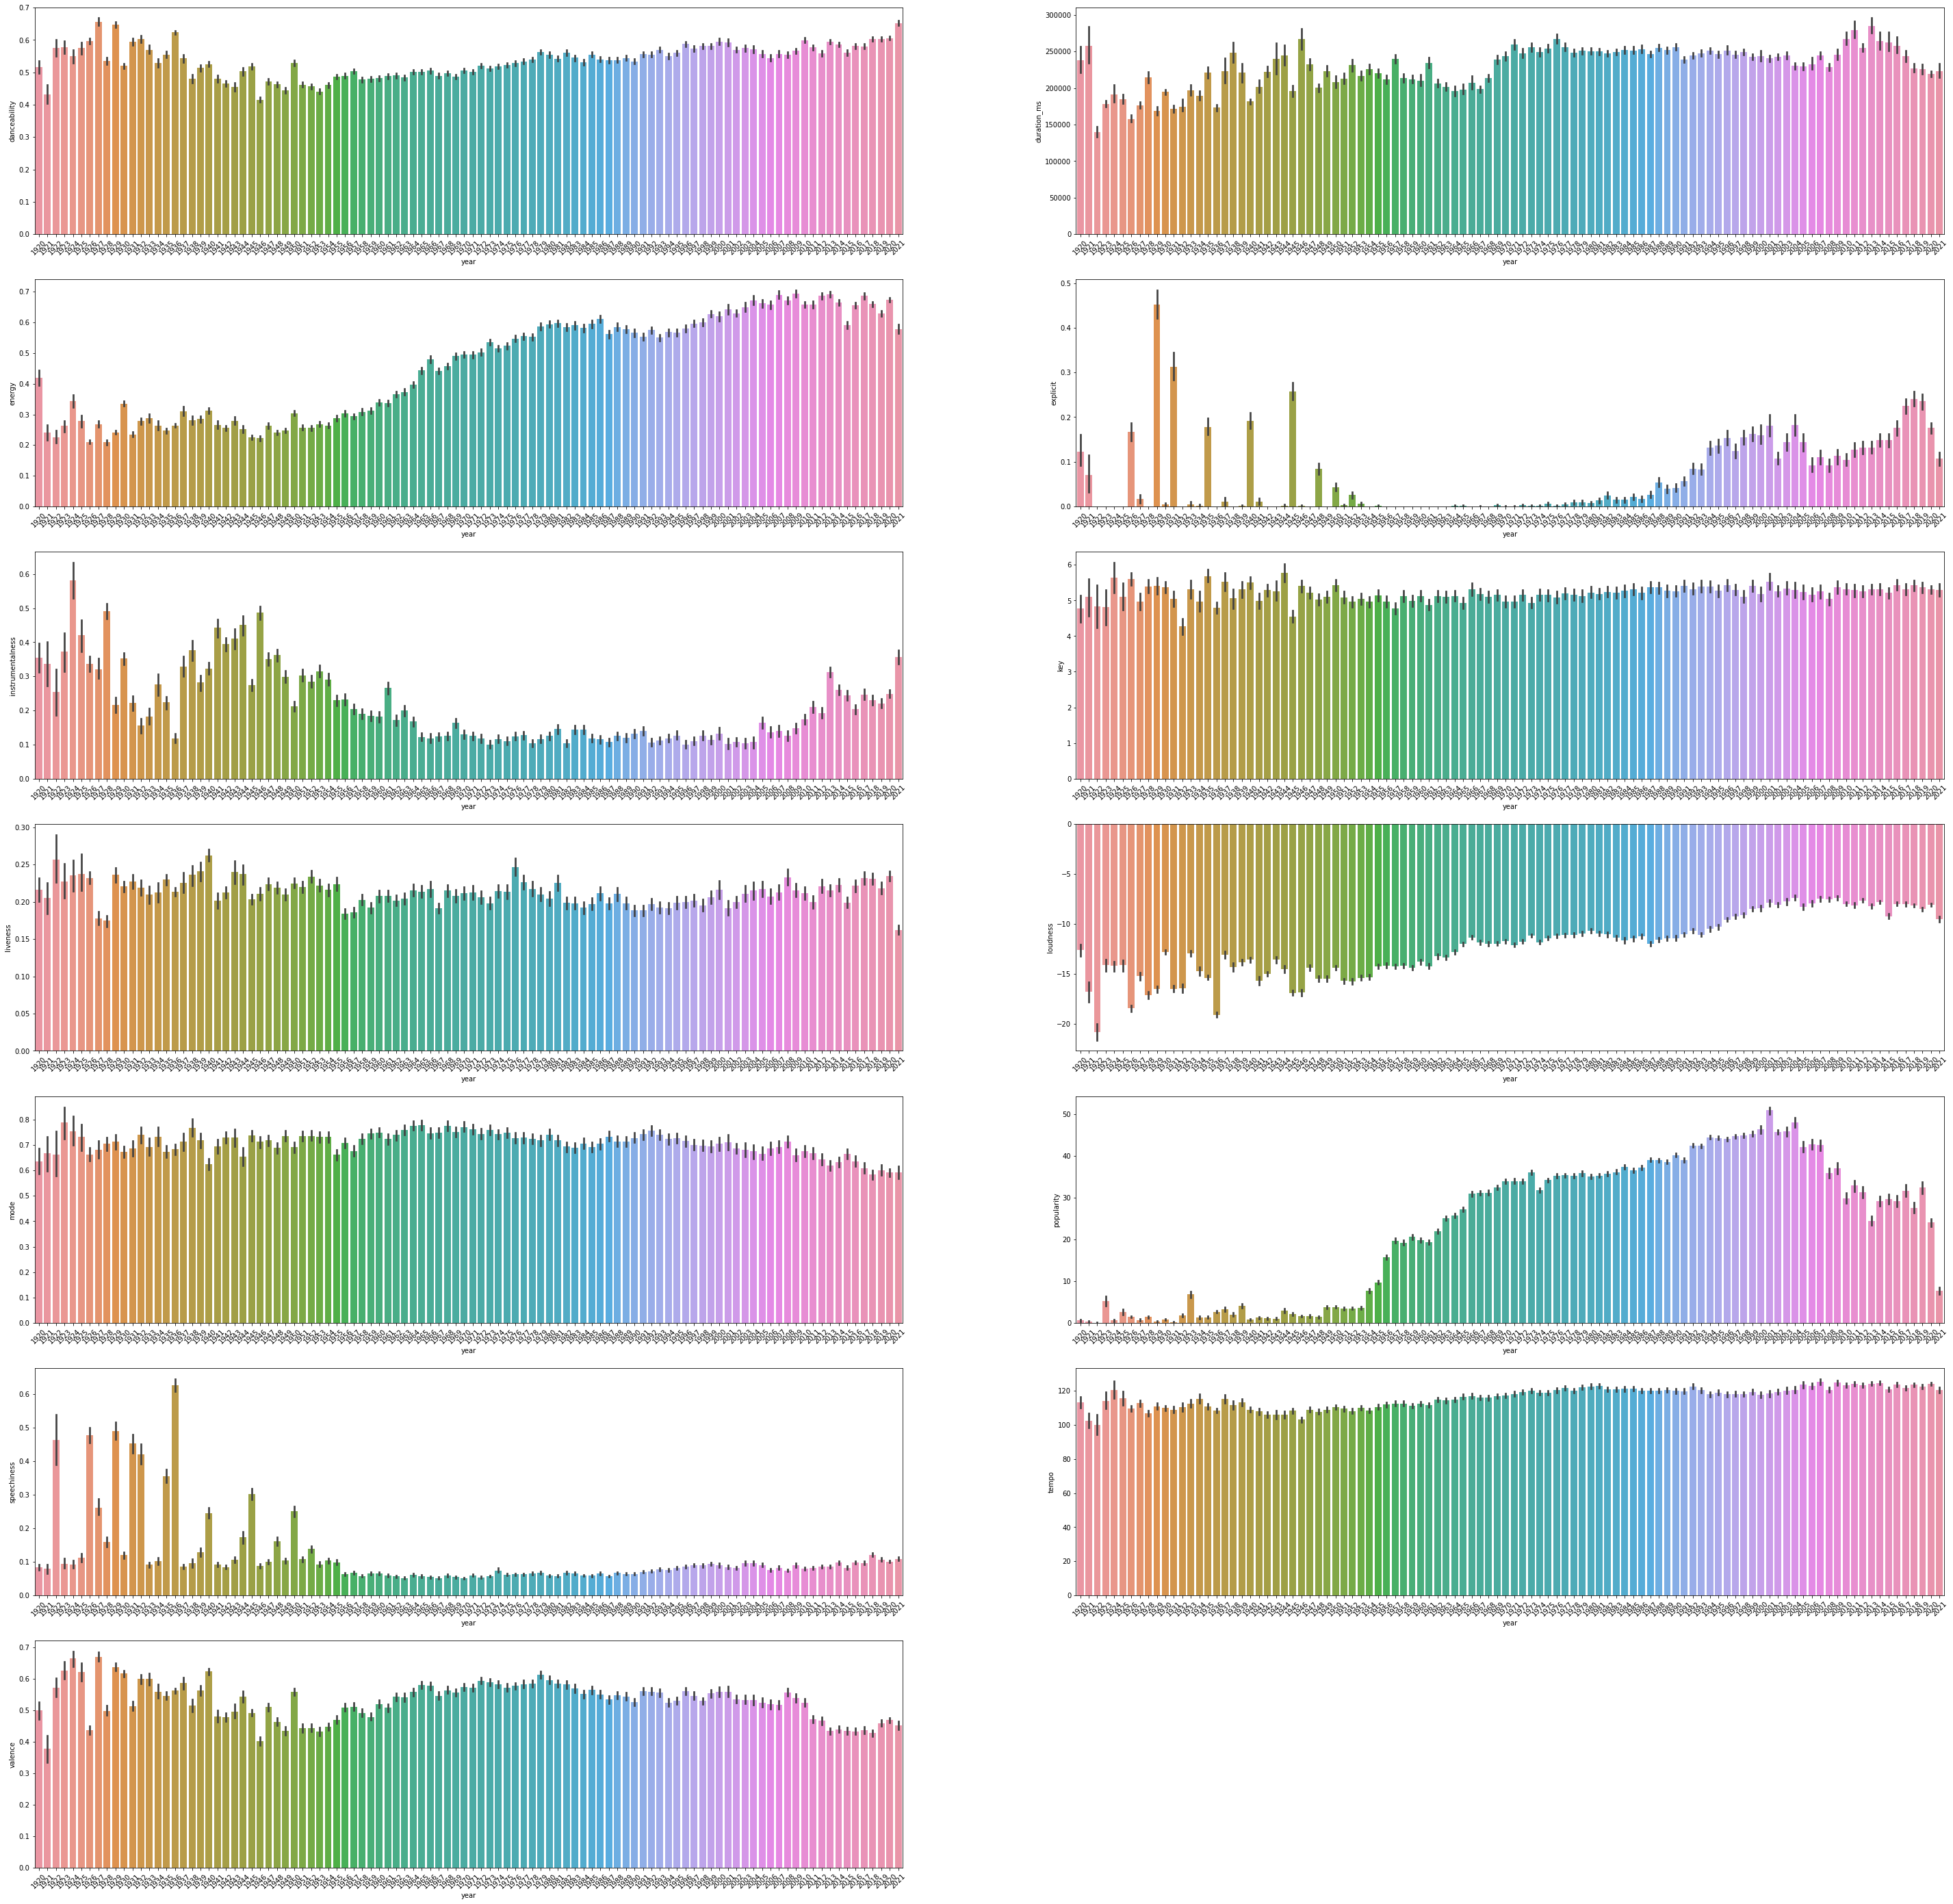

In [9]:
viz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(viz_data.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=data.year,y=viz_data[viz_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

As can be seen from the plots, nowadays music became more energetic and popular. The loudness decreased and duration increased.

#### Correlation

Let's check if any features correlates with each other.

#### Pearson Correlation

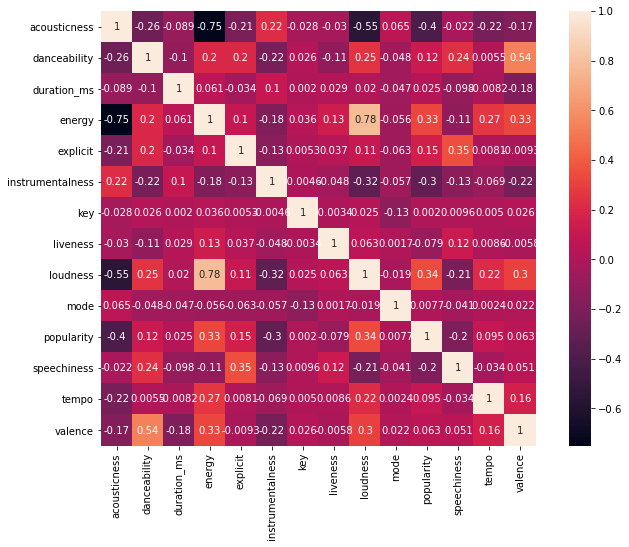

In [11]:
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data.corr(), annot=True, square=True)
plt.show()

As we can see, loudness greatly correlates with energy/accousticness and accousticness correlates with energy.

### Feature Engineering

In [229]:
data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920


As we will use our data to calculate the distances between the songs and our feature's data veries, we will create a function to normalize it.

In [232]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

Now, let's get all the numerical columns and normalize them.

In [233]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

Let's check if our data transformed correctly.

In [235]:
data.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.994980,['Mamie Smith'],0.605263,0.0,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.0,0.3790,0.741868,0.0,Keep A Song In Your Soul,0.12,1920,0.096395,0.615900,0.634,0.0
1,0.645582,"[""Screamin' Jay Hawkins""]",0.862348,0.0,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.0,0.0809,0.825918,0.0,I Put A Spell On You,0.07,1920-01-05,0.054995,0.356823,0.950,0.0
2,0.996988,['Mamie Smith'],0.654858,0.0,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,0.750168,1.0,Golfing Papa,0.04,1920,0.179197,0.400810,0.689,0.0


Seems like everything worked fine.

There is a probability, that songs from the different genres could have quite similar characteristics, and that's not fine. 

For example, Nicki Minaj songs won't be an accurate recomendation for Slayer songs.

That's why we will create a new feature, which would differ the songs from different groups.

We will use KMeans clusterization with 10 clusters for this goal.

In [267]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

Let's check the result.

In [268]:
data.cat[:10]

0    0.111111
1    0.555556
2    0.555556
3    0.222222
4    0.222222
5    0.222222
6    0.555556
7    0.555556
8    0.222222
9    0.222222
Name: cat, dtype: float64

Seems like everything is fine, let's move on.

### Recommendation System

Our data has numeric features like acousticness, danceability, energy etc, we will use it to find the most similar songs for ours. 

In [12]:
caya=data[data.name=='Come As You Are']
caya.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
14064,0.00016,['Nirvana'],0.500,218920,0.824,0,4P5KoWXOxwuobLmHXLMobV,0.00161,4,0.0916,-5.846,0,Come As You Are,73,1991-09-26,0.0388,120.125,0.539,1991
14852,0.55400,['Nirvana'],0.683,253907,0.766,0,3sYWyVGfPuit80szWXhrRA,0.00346,5,0.0815,-8.733,0,Come As You Are,63,1994-11-01,0.0410,119.190,0.568,1994
52547,0.00016,['Nirvana'],0.500,218920,0.824,0,7aCSKL5LmVhakVs0l483B5,0.00161,4,0.0916,-5.846,0,Come As You Are,40,1991-09-26,0.0388,120.125,0.539,1991


As there could be many versions of the same song (example above), we will always take the oldest version.

Now, let's create a class which will make the recomendations for our songs.

To find the difference among the songs, we will calculate the manhattan distance between all of them. 

And, as the result, we will choose the songs with the smallest distances.

In [269]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

Let's create the object of our SpotifyRecommender.

In [270]:
recommender = SpotifyRecommender(data)

#### Nirvana - Come As You Are

In [271]:
recommender.get_recommendations('come as you are', 5)

100%|██████████| 174382/174382 [00:07<00:00, 24234.09it/s]


,artists,name
12292,['Judas Priest'],You've Got Another Thing Coming
14063,['Metallica'],Enter Sandman
18324,['MARINA'],Bubblegum Bitch
15466,['Rob Zombie'],Dragula
18972,['Tame Impala'],Let It Happen


Seems like results are pretty logical, as all the songs have pretty similar genre and the sounding.

Let's test our function on the other songs.

#### Motörhead - Ace Of Spades 

In [274]:
recommender.get_recommendations('ace of spades', 5)

100%|██████████| 174387/174387 [00:07<00:00, 24148.95it/s]


,artists,name
12496,['Ozzy Osbourne'],Bark at the Moon
13677,['Alice Cooper'],Poison
14012,['Slayer'],Seasons In The Abyss
11064,['Blue Öyster Cult'],(Don't Fear) The Reaper
12477,['Quiet Riot'],Cum on Feel the Noize


#### 50 Cent - In Da Club

In [273]:
recommender.get_recommendations('in da club', 5)

100%|██████████| 174384/174384 [00:07<00:00, 23566.78it/s]


,artists,name
15672,"['MF DOOM', 'Pebbles The Invisible Girl']",Doomsday
38142,['Berner'],20 Joints
16630,['G-Unit'],Poppin' Them Thangs
142639,['6ix9ine'],BILLY
73212,"['MF DOOM', 'MF Grimm']",Doomsday


#### Lil Skies - Red Roses (feat. Landon Cube)

In [278]:
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

100%|██████████| 174388/174388 [00:07<00:00, 23415.25it/s]


,artists,name
93550,"['Vince Staples', '6LACK', 'Mereba']","Yo Love - From ""Queen & Slim: The Soundtrack"""
142983,['Eric Reprid'],Cold World
126169,"['Maroon 5', 'Cardi B']",Girls Like You (feat. Cardi B)
76120,['Bazzi'],3:15
76082,"['Maroon 5', 'Cardi B']",Girls Like You (feat. Cardi B)


Seems like recommender works pretty fine and gives us really accurate recommendations.